In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from prettytable import PrettyTable

# Reading Data

In [2]:
data = pd.read_excel('Data_Train.xlsx')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
data.shape

(10683, 11)

In [4]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


# Data Exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data.duplicated().sum()

220

In [7]:
data.drop_duplicates(inplace = True)

In [8]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
data.dropna(inplace = True)

In [10]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
## explore categorical columns
## explore dates
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
test_df = pd.read_excel("Test_set.xlsx")
test_df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


In [13]:
test_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [15]:
test_df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [16]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [17]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [18]:
data["Journey_day"] = data['Date_of_Journey'].str.split('/').str[0].astype(int)
data["Journey_month"] = data['Date_of_Journey'].str.split('/').str[1].astype(int)
data["Journey_year"] = data['Date_of_Journey'].str.split('/').str[2].astype(int)
data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [19]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [20]:
# PreProcessing of Duration Columns and Derive New Two Columns (Duration_Hours,Duration_Min)
data['Duration'].unique()

# Function for impute duration values like 0h or 0m
def impute_Duration(duration):
    x = duration.split()
    
    if len(x) != 2:
        if 'h' in x[0]:
            return x[0] + ' 0m'
        else:
            return '0h ' + x[0]
        
    else:
        return duration
# Call Function
data['Duration'] = data['Duration'].apply(impute_Duration)

In [21]:
# Make New Two Columns of Duration
data['Duration_Hour'] = data['Duration'].apply(lambda x:int(x.split('h')[0]))
data['Duration_Minute'] = data['Duration'].apply(lambda x:x.split('m')[0].split()[1])
data.drop(["Duration"], axis = 1, inplace = True)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,2019,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,5,2019,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,6,2019,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,12,5,2019,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,1,3,2019,4,45


In [22]:
train_categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = data.select_dtypes(include=['int64', 'float','int32'])

test_categorical_data = test_df.select_dtypes(exclude=['int64', 'float','int32','int32'])
test_numerical_data  = test_df.select_dtypes(include=['int64', 'float','int32'])
train_categorical_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,45


In [23]:
data['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [24]:
data['Airline'].nunique()

12

In [25]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,2019,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,5,2019,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,6,2019,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,12,5,2019,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,1,3,2019,4,45


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Dep_Time         10462 non-null  object
 5   Arrival_Time     10462 non-null  object
 6   Total_Stops      10462 non-null  object
 7   Additional_Info  10462 non-null  object
 8   Price            10462 non-null  int64 
 9   Journey_day      10462 non-null  int32 
 10  Journey_month    10462 non-null  int32 
 11  Journey_year     10462 non-null  int32 
 12  Duration_Hour    10462 non-null  int64 
 13  Duration_Minute  10462 non-null  object
dtypes: int32(3), int64(2), object(9)
memory usage: 1.1+ MB


In [27]:
data['Journey_year'].value_counts()

2019    10462
Name: Journey_year, dtype: int64

In [28]:
data['Journey_month'].value_counts()

5    3395
6    3311
3    2678
4    1078
Name: Journey_month, dtype: int64

In [29]:
data['Journey_day'].value_counts()

9     1375
6     1268
27    1092
21    1085
1     1058
24    1022
15     967
12     946
3      835
18     814
Name: Journey_day, dtype: int64

In [30]:
data.loc[data['Airline'] == 'IndiGo', 'Journey_day'].value_counts()   # ['journey_day'].value_counts()

9     251
27    238
3     232
15    218
21    206
6     204
24    199
1     184
18    159
12    152
Name: Journey_day, dtype: int64

In [31]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Duration_Hour', 'Duration_Minute'],
      dtype='object')

In [32]:
data['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [33]:
data['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [34]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,2019,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,5,2019,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,6,2019,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,12,5,2019,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,1,3,2019,4,45


In [35]:
data.loc[(data['Source'] == 'Delhi') & (data['Destination'] == 'Cochin')].shape[0]

4345

In [36]:
data['no_of_cities'] = data['Route'].apply(lambda x : len(x.split(' → ')) - 2)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Duration_Hour,Duration_Minute,no_of_cities
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,2019,2,50,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,5,2019,7,25,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,6,2019,19,0,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,12,5,2019,5,25,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,1,3,2019,4,45,1


In [37]:
def get_month(arrival_time) :
    x = arrival_time.split(' ')
    if len(x) == 3 :
        month = x[-1]
    else :
        month = 'no_month'
    return month

data['arrival_month'] = data['Arrival_Time'].apply(get_month) 
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Duration_Hour,Duration_Minute,no_of_cities,arrival_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,2019,2,50,0,Mar
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,5,2019,7,25,2,no_month
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,6,2019,19,0,2,Jun
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,12,5,2019,5,25,1,no_month
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,1,3,2019,4,45,1,no_month


In [38]:
def get_day(arrival_time) :
    x = arrival_time.split(' ')
    if (len(x) == 3) or (len(x) == 2) :
        day = x[1]
    else :
        day = 'no_day'
    return day

data['arrival_day'] = data['Arrival_Time'].apply(get_day) 
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Duration_Hour,Duration_Minute,no_of_cities,arrival_month,arrival_day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,2019,2,50,0,Mar,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,5,2019,7,25,2,no_month,no_day
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,6,2019,19,0,2,Jun,10
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,12,5,2019,5,25,1,no_month,no_day
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,1,3,2019,4,45,1,no_month,no_day


In [39]:
def get_minute(arrival_time) :
    x = arrival_time.split(' ')[0]
    return x.split(':')[1]
    
data['arrival_minute'] = data['Arrival_Time'].apply(get_minute) 
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Duration_Hour,Duration_Minute,no_of_cities,arrival_month,arrival_day,arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,2019,2,50,0,Mar,22,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,5,2019,7,25,2,no_month,no_day,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,6,2019,19,0,2,Jun,10,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,12,5,2019,5,25,1,no_month,no_day,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,1,3,2019,4,45,1,no_month,no_day,35


In [40]:
def get_hour(arrival_time) :
    x = arrival_time.split(' ')[0]
    return x.split(':')[0]
    
data['arrival_hour'] = data['Arrival_Time'].apply(get_hour) 
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Duration_Hour,Duration_Minute,no_of_cities,arrival_month,arrival_day,arrival_minute,arrival_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,2019,2,50,0,Mar,22,10,01
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,5,2019,7,25,2,no_month,no_day,15,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,6,2019,19,0,2,Jun,10,25,04
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,12,5,2019,5,25,1,no_month,no_day,30,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,1,3,2019,4,45,1,no_month,no_day,35,21


In [41]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Duration_Hour', 'Duration_Minute',
       'no_of_cities', 'arrival_month', 'arrival_day', 'arrival_minute',
       'arrival_hour'],
      dtype='object')

In [42]:
data[['Journey_day', 'arrival_day']]

,Journey_day,arrival_day
0,24,22
1,1,no_day
2,9,10
3,12,no_day
4,1,no_day
...,...,...
10678,9,no_day
10679,27,no_day
10680,27,no_day
10681,1,no_day


In [43]:
data.loc[data['arrival_day'] == 'no_day', 'arrival_day'] = data.loc[data['arrival_day'] == 'no_day', 'Journey_day']

In [44]:
data['arrival_day'] = data['arrival_day'].astype(int)

In [45]:
(data['Journey_day'] <= data['arrival_day']).sum()

10373

In [46]:
data.loc[data['Journey_day'] > data['arrival_day'], 'arrival_day'] = data.loc[data['Journey_day'] > data['arrival_day'], 'Journey_day']

In [47]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Duration_Hour,Duration_Minute,no_of_cities,arrival_month,arrival_day,arrival_minute,arrival_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,2019,2,50,0,Mar,24,10,01
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,5,2019,7,25,2,no_month,1,15,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,6,2019,19,0,2,Jun,10,25,04
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,12,5,2019,5,25,1,no_month,12,30,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,1,3,2019,4,45,1,no_month,1,35,21


In [48]:
data.drop(["Arrival_Time"], axis = 1, inplace = True)


In [49]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Duration_Hour,Duration_Minute,no_of_cities,arrival_month,arrival_day,arrival_minute,arrival_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,non-stop,No info,3897,24,3,2019,2,50,0,Mar,24,10,01
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,No info,7662,1,5,2019,7,25,2,no_month,1,15,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,No info,13882,9,6,2019,19,0,2,Jun,10,25,04
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,1 stop,No info,6218,12,5,2019,5,25,1,no_month,12,30,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,1 stop,No info,13302,1,3,2019,4,45,1,no_month,1,35,21


In [50]:
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute
data.drop(["Dep_Time"], axis = 1, inplace = True)

In [51]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Duration_Hour,Duration_Minute,no_of_cities,arrival_month,arrival_day,arrival_minute,arrival_hour,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,2,50,0,Mar,24,10,01,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,7,25,2,no_month,1,15,13,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,19,0,2,Jun,10,25,04,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,5,25,1,no_month,12,30,23,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,4,45,1,no_month,1,35,21,16,50


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Total_Stops      10462 non-null  object
 5   Additional_Info  10462 non-null  object
 6   Price            10462 non-null  int64 
 7   Journey_day      10462 non-null  int32 
 8   Journey_month    10462 non-null  int32 
 9   Journey_year     10462 non-null  int32 
 10  Duration_Hour    10462 non-null  int64 
 11  Duration_Minute  10462 non-null  object
 12  no_of_cities     10462 non-null  int64 
 13  arrival_month    10462 non-null  object
 14  arrival_day      10462 non-null  int32 
 15  arrival_minute   10462 non-null  object
 16  arrival_hour     10462 non-null  object
 17  Dep_hour         10462 non-null

In [53]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Duration_Hour,Duration_Minute,no_of_cities,arrival_month,arrival_day,arrival_minute,arrival_hour,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,2,50,0,Mar,24,10,01,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,7,25,2,no_month,1,15,13,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,19,0,2,Jun,10,25,04,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,5,25,1,no_month,12,30,23,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,4,45,1,no_month,1,35,21,16,50


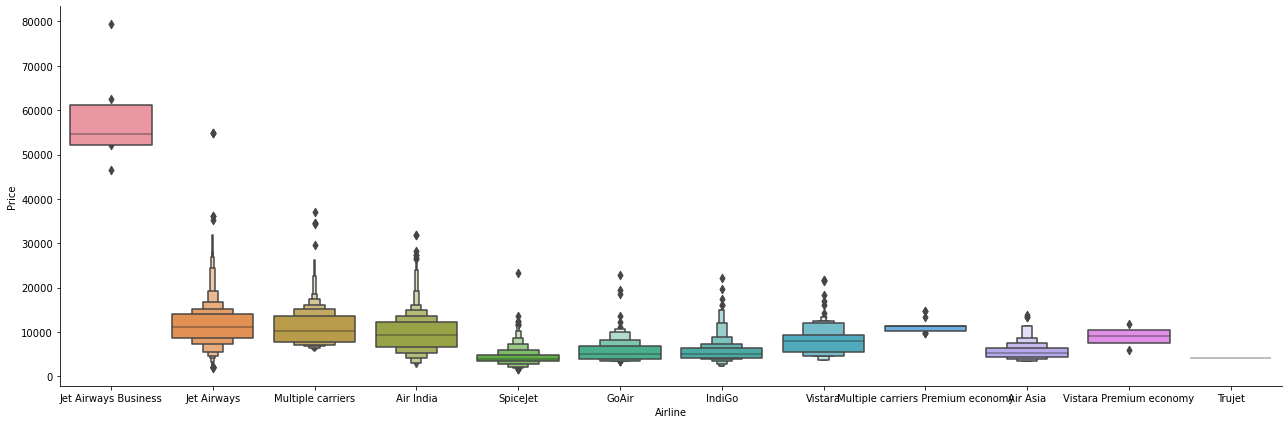

In [54]:

sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

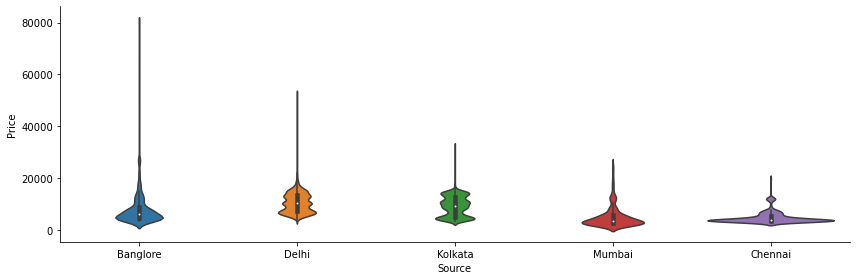

In [55]:
#Plotting Violin plot for Price vs Source
sns.catplot(y = "Price", x = "Source", data = data.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

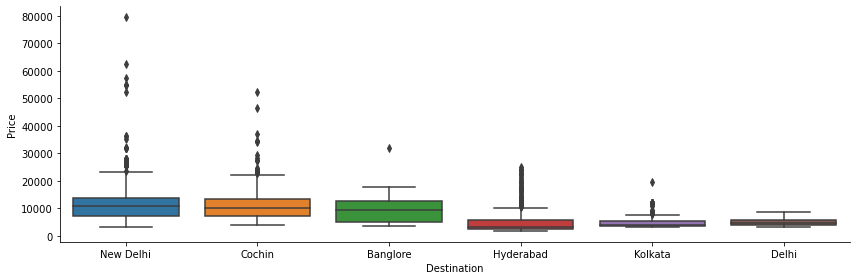

In [56]:
#Plotting Box plot for Price vs Destination
sns.catplot(y = "Price", x = "Destination", data = data.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

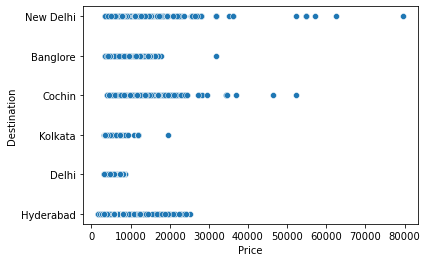

In [57]:
sns.scatterplot(data=data,x='Price',y='Destination')

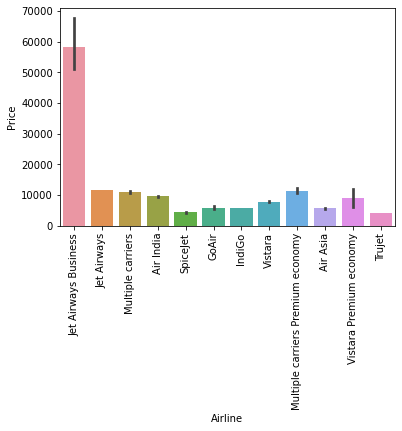

In [58]:
sns.barplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False))
plt.xticks(rotation=90)
plt.show()

In [59]:
# for check Outliers
# df[(df['Airline'] == 'Air Asia') & (df['Source'] == 'Banglore') & (df['Price']>5265) & (df['Destination'] == 'Delhi')]

# Function for remove ourliers
def remove_airline_price_outliers(data):
    df_out = pd.DataFrame()
    for airline,airline_data in data.groupby('Airline'): 
        for source,source_data in airline_data.groupby('Source'):
            for destination,destination_data in source_data.groupby('Destination'):
                
                m = np.mean(destination_data['Price'])
                st = np.std(destination_data['Price'])
                
                reduced_data = destination_data[(destination_data['Price'] >=(m-st)) & (destination_data['Price'] <= (m+st))]
                
                df_out = pd.concat([df_out,reduced_data],ignore_index=True)
        
    return df_out
        
df2 = remove_airline_price_outliers(data)

In [60]:
data.shape,df2.shape

((10462, 19), (7884, 19))

In [61]:
# Convert Airlines,Source and Destinations to Numerical Using Encoding
dummies = pd.get_dummies(df2[['Airline','Source','Destination']],drop_first=True)

In [62]:
cols = list(df2.columns) + list(dummies.columns)
cols

['Airline',
 'Source',
 'Destination',
 'Route',
 'Total_Stops',
 'Additional_Info',
 'Price',
 'Journey_day',
 'Journey_month',
 'Journey_year',
 'Duration_Hour',
 'Duration_Minute',
 'no_of_cities',
 'arrival_month',
 'arrival_day',
 'arrival_minute',
 'arrival_hour',
 'Dep_hour',
 'Dep_min',
 'Airline_Air India',
 'Airline_GoAir',
 'Airline_IndiGo',
 'Airline_Jet Airways',
 'Airline_Jet Airways Business',
 'Airline_Multiple carriers',
 'Airline_Multiple carriers Premium economy',
 'Airline_SpiceJet',
 'Airline_Trujet',
 'Airline_Vistara',
 'Airline_Vistara Premium economy',
 'Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Destination_New Delhi']

In [63]:
# Now Concat Dummies of Categorical Variable to Real DataFrame
df3 = pd.concat([df2,dummies],ignore_index=True,axis=1)
df3.columns = cols

In [64]:
final_df = df3.drop(['Airline','Source','Destination'],axis=1)

In [65]:
final_df.sample(5)

,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Duration_Hour,Duration_Minute,no_of_cities,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
4510,DEL → JAI → BOM → COK,2 stops,In-flight meal not included,10368,15,6,2019,13,30,2,...,0,0,1,0,0,1,0,0,0,0
1927,BLR → DEL,non-stop,No info,5694,24,3,2019,2,55,0,...,0,0,0,0,0,0,0,0,0,1
7855,CCU → DEL → BLR,1 stop,No info,9345,24,5,2019,24,0,1,...,0,0,0,1,0,0,0,0,0,0
6032,DEL → BOM → COK,1 stop,No info,13587,1,6,2019,12,0,1,...,0,0,1,0,0,1,0,0,0,0
632,DEL → HYD → MAA → COK,2 stops,No info,10975,15,5,2019,23,40,2,...,0,0,1,0,0,1,0,0,0,0


In [66]:
final_df.shape

(7884, 36)

In [67]:
final_df.corr()['Price'].sort_values(ascending=False)

Price                                        1.000000
no_of_cities                                 0.687085
Duration_Hour                                0.627066
Airline_Jet Airways                          0.531268
Source_Delhi                                 0.352125
Destination_Cochin                           0.352125
Airline_Jet Airways Business                 0.268282
Destination_New Delhi                        0.202865
Airline_Multiple carriers                    0.175970
Airline_Air India                            0.096099
Airline_Multiple carriers Premium economy    0.020228
Dep_hour                                     0.014681
Source_Kolkata                               0.009341
Airline_Vistara Premium economy              0.002935
Airline_Trujet                              -0.012297
Journey_month                               -0.021623
arrival_day                                 -0.061172
Airline_Vistara                             -0.062705
Dep_min                     

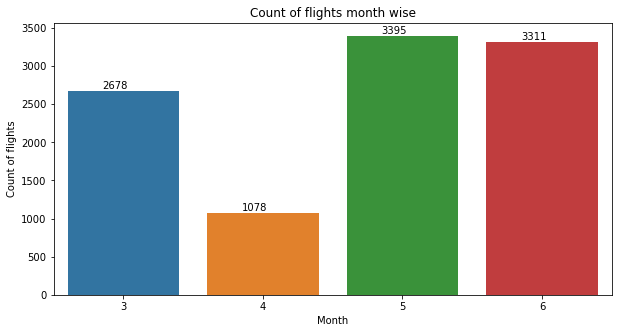

In [68]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = data)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

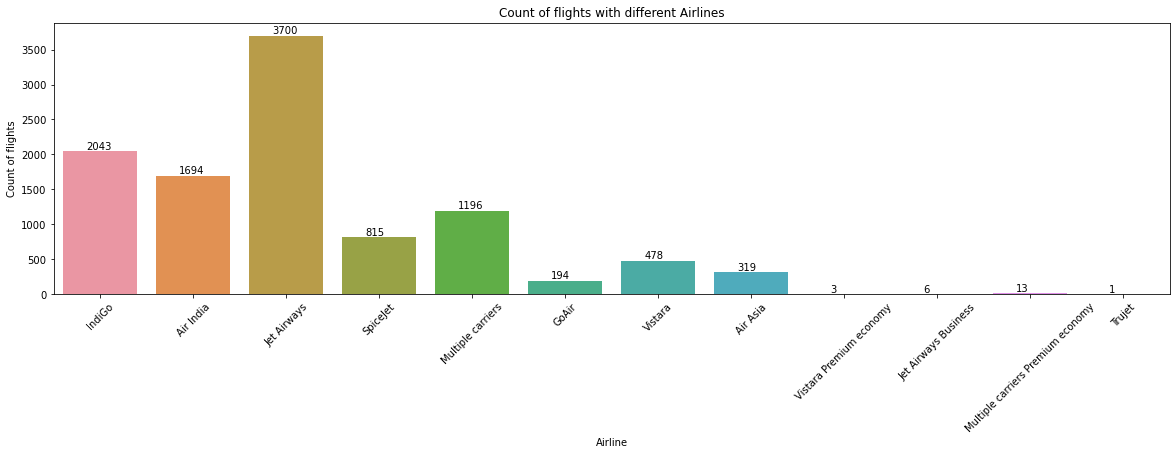

In [69]:
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

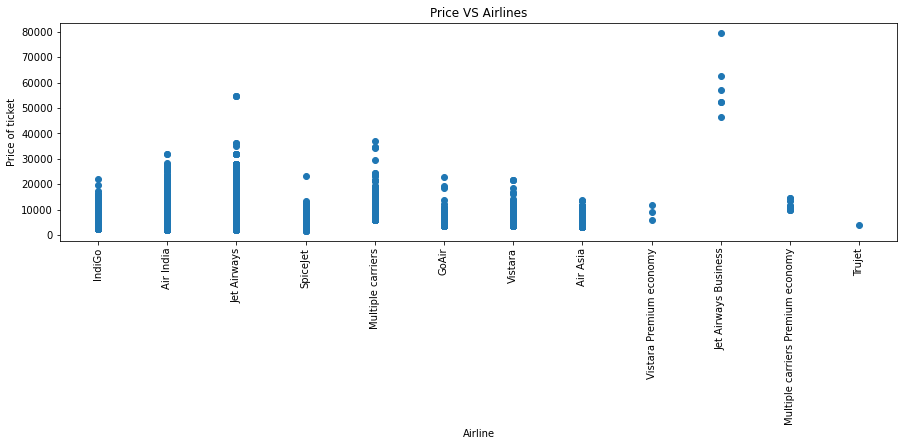

In [70]:
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(data['Airline'], data['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

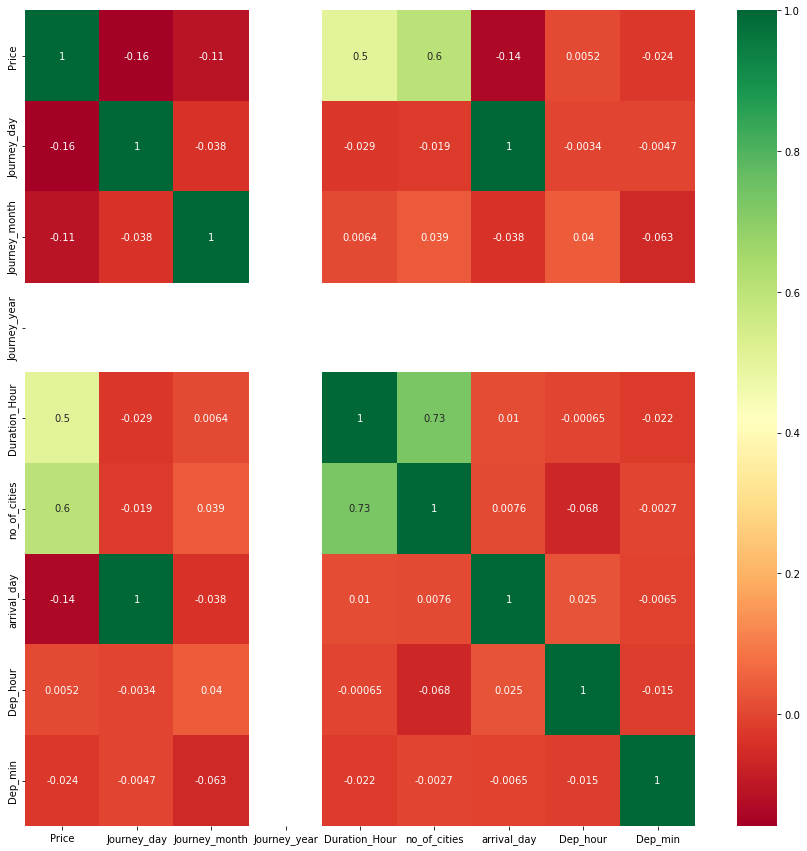

In [71]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [72]:
#Dealing with Categorical Data and Numerical Data

train_categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = data.select_dtypes(include=['int64', 'float','int32'])

test_categorical_data = test_df.select_dtypes(exclude=['int64', 'float','int32','int32'])
test_numerical_data  = test_df.select_dtypes(include=['int64', 'float','int32'])
train_categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration_Minute,arrival_month,arrival_minute,arrival_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,50,Mar,10,01
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,25,no_month,15,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,0,Jun,25,04
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,25,no_month,30,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,45,no_month,35,21


In [73]:
# will use one-hot encoding to handle this variable.
Airline = data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)


In [74]:
#Source  and Destination Variable 
Source = data[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Destination = data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

In [75]:
# Route variable
data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [76]:
#Total_Stops Variable
data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [77]:
#  LabelEncoder here to handle this variable
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [78]:
data.columns 

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Journey_year', 'Duration_Hour',
       'Duration_Minute', 'no_of_cities', 'arrival_month', 'arrival_day',
       'arrival_minute', 'arrival_hour', 'Dep_hour', 'Dep_min'],
      dtype='object')

In [79]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Duration_Hour,Duration_Minute,no_of_cities,arrival_month,arrival_day,arrival_minute,arrival_hour,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,2,50,0,Mar,24,10,01,22,20
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,7,25,2,no_month,1,15,13,5,50
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,19,0,2,Jun,10,25,04,9,25
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,5,25,1,no_month,12,30,23,18,5
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,4,45,1,no_month,1,35,21,16,50


In [80]:
def GetDiff(arrival_day,DepDay) : 
    if arrival_day != 'None' : 
        if int(arrival_day) - int(DepDay) == 4 : 
            return True
        else :
            return False
    else : 
        return False
    
data['Big Diff'] = data.apply(lambda x : GetDiff(x.arrival_day,x.Journey_day),axis=1)

In [81]:
data['Big Diff'].value_counts()

False    10410
True        52
Name: Big Diff, dtype: int64

In [82]:
data.drop(data[data['Big Diff']==True].index,axis=0,inplace=True)
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)


In [83]:
data['Big Diff'].value_counts()

False    10410
Name: Big Diff, dtype: int64

In [84]:
## period of day in departure and arrival time

def DayPart(n) : 
    H = int(n.split(':')[0])
    if H < 6 : 
        return 'Early Morning'
    elif 6<=H < 12 : 
        return 'Morning'
    elif  12<=H < 15 : 
        return 'Noon'
    elif  15<=H < 19 : 
        return 'Evening'
    else : 
        return 'Night'

In [85]:
data.corr()

,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Duration_Hour,no_of_cities,arrival_day,Dep_hour,Dep_min,Big Diff
Total_Stops,1.000000,0.601728,-0.015914,0.041326,NaN,0.730363,1.000000,0.010155,-0.064516,-0.003249,NaN
Price,0.601728,1.000000,-0.157783,-0.113407,NaN,0.504454,0.601728,-0.138462,0.007580,-0.024595,NaN
Journey_day,-0.015914,-0.157783,1.000000,-0.043459,NaN,-0.024643,-0.015914,0.998300,-0.004423,-0.004537,NaN
Journey_month,0.041326,-0.113407,-0.043459,1.000000,NaN,0.012615,0.041326,-0.040102,0.042678,-0.063302,NaN
Journey_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration_Hour,0.730363,0.504454,-0.024643,0.012615,NaN,1.000000,0.730363,0.013532,0.004835,-0.023314,NaN
no_of_cities,1.000000,0.601728,-0.015914,0.041326,NaN,0.730363,1.000000,0.010155,-0.064516,-0.003249,NaN
arrival_day,0.010155,-0.138462,0.998300,-0.040102,NaN,0.013532,0.010155,1.000000,0.023174,-0.006289,NaN
Dep_hour,-0.064516,0.007580,-0.004423,0.042678,NaN,0.004835,-0.064516,0.023174,1.000000,-0.012889,NaN
Dep_min,-0.003249,-0.024595,-0.004537,-0.063302,NaN,-0.023314,-0.003249,-0.006289,-0.012889,1.000000,NaN


In [86]:
data['Duration_Minute'].min(),data['Duration_Minute'].max()

('0', '55')

In [87]:
def FlightLength(H) : 
    if H < 180 : 
        return 'Short'
    elif 180<=H < 600 : 
        return 'Medium'
    else : 
        return 'Long'

In [88]:
data['Price'].min(),data['Price'].max()

(1759, 79512)

In [89]:
def PriceRange(H) : 
    if H < 5000 : 
        return 'Cheap'
    elif 5000<=H < 10000 : 
        return 'Medium'
    else : 
        return 'Expensive'

In [90]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

## Data Visualization

In [91]:
def CPlot(feature) : 
    global data
    fig,ax = plt.subplots(figsize = (10,6))
    sns.countplot(x = feature,data=data,facecolor = (0,0,0,0),linewidth = 5,
                  edgecolor= sns.color_palette('dark',3))
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
    return None

def KPlot(feature) : 
    global data
    fig,ax = plt.subplots(figsize = (10,6))
    sns.kdeplot(data[feature],shade=True)
    return None

def Pie(feature,limit=20) : 
    global data
    fig,ax = plt.subplots(figsize = (10,6))
    plt.pie(data[feature].value_counts()[:limit],labels = list(data[feature].value_counts()[:limit].index),
            autopct = '%1.2f%%',labeldistance= 1.1)
    return None
   

In [92]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Duration_Hour,Duration_Minute,no_of_cities,arrival_month,arrival_day,arrival_minute,arrival_hour,Dep_hour,Dep_min,Big Diff
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,2,50,0,Mar,24,10,01,22,20,False
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,7,25,2,no_month,1,15,13,5,50,False
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,19,0,2,Jun,10,25,04,9,25,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,5,25,1,no_month,12,30,23,18,5,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,4,45,1,no_month,1,35,21,16,50,False


In [93]:
len(data['Airline'].unique())

12

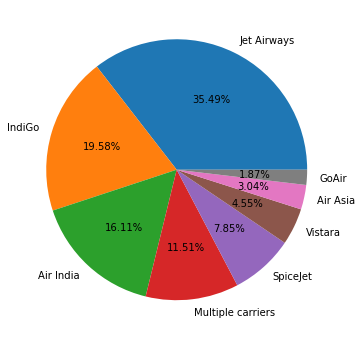

In [94]:
Pie('Airline',8)

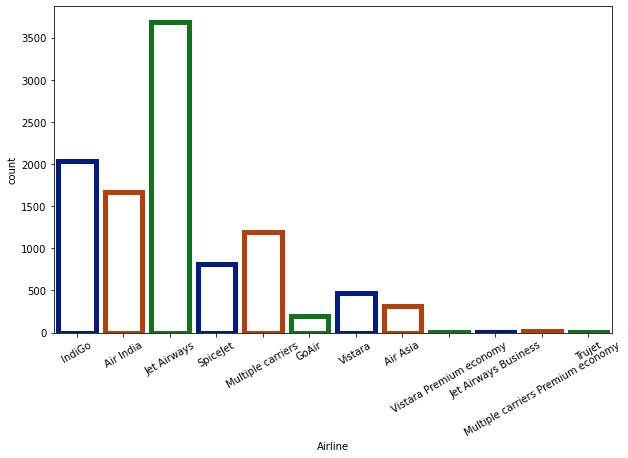

In [95]:
CPlot('Airline')

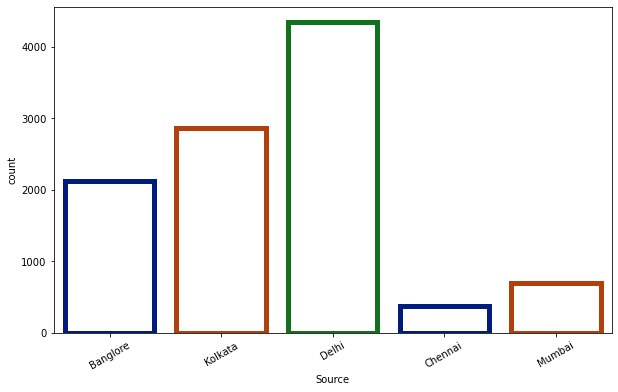

In [96]:
CPlot('Source')

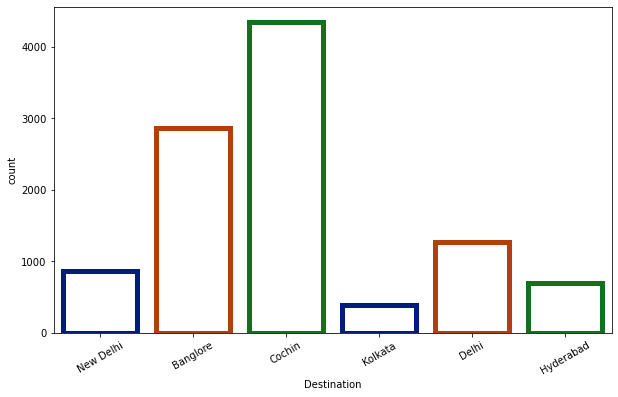

In [97]:
CPlot('Destination')

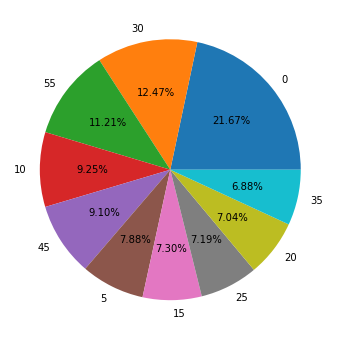

In [98]:
Pie('Dep_min',10)

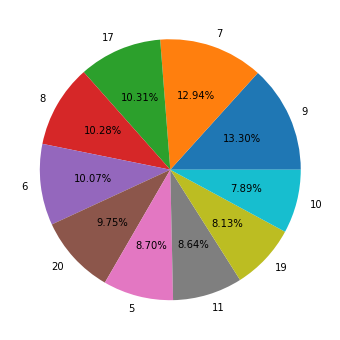

In [99]:
Pie('Dep_hour',10)

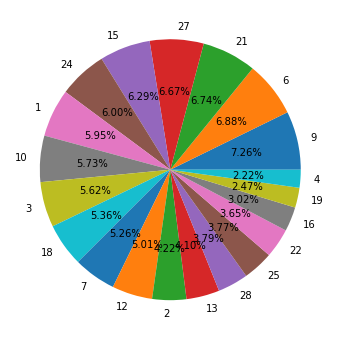

In [100]:
Pie('arrival_day')

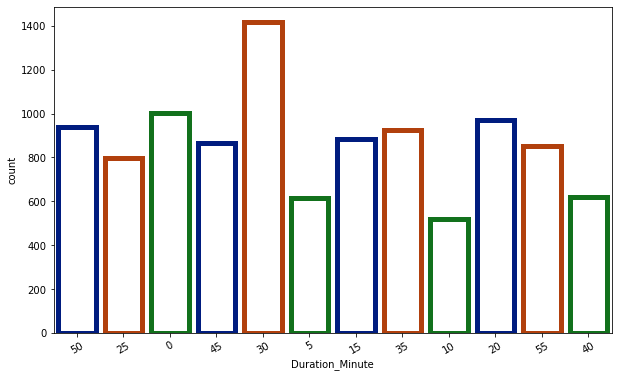

In [101]:
CPlot('Duration_Minute')

In [102]:
#KPlot('Duration_Minute')

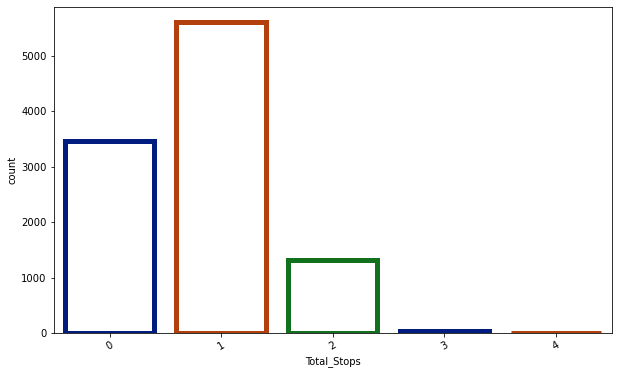

In [103]:
CPlot('Total_Stops')

In [104]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Journey_year', 'Duration_Hour',
       'Duration_Minute', 'no_of_cities', 'arrival_month', 'arrival_day',
       'arrival_minute', 'arrival_hour', 'Dep_hour', 'Dep_min', 'Big Diff'],
      dtype='object')

<ipython-input-91-a5e19e38229b>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature],shade=True)


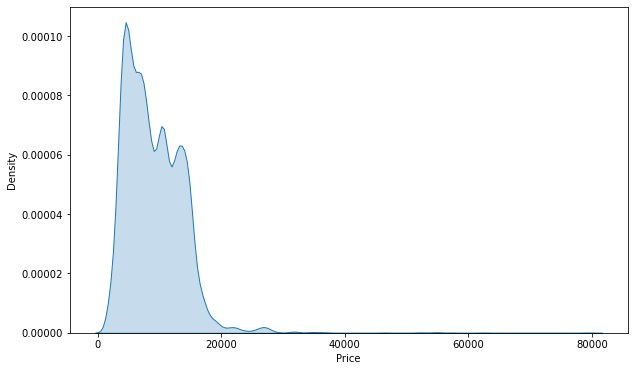

In [105]:
KPlot('Price')

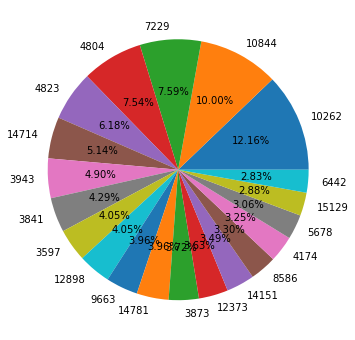

In [106]:
Pie('Price')

In [107]:
data['Price'].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

## Data Preparing

In [108]:
pd.set_option('display.max_columns',None)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Duration_Hour,Duration_Minute,no_of_cities,arrival_month,arrival_day,arrival_minute,arrival_hour,Dep_hour,Dep_min,Big Diff
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,2,50,0,Mar,24,10,01,22,20,False
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,7,25,2,no_month,1,15,13,5,50,False
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,19,0,2,Jun,10,25,04,9,25,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,5,25,1,no_month,12,30,23,18,5,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,4,45,1,no_month,1,35,21,16,50,False


In [109]:
from sklearn.preprocessing import LabelEncoder

In [110]:
AirLineEnc,SourceEnc,DestinationEnc,AdditionalInfoEnc,MealIncludedEnc,DepDayEnc,ArrivDayEnc,FlightLengthEnc,arrival_monthEnc,BigDiffEnc = LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder()

In [111]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Duration_Hour,Duration_Minute,no_of_cities,arrival_month,arrival_day,arrival_minute,arrival_hour,Dep_hour,Dep_min,Big Diff
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,2,50,0,Mar,24,10,01,22,20,False
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,7,25,2,no_month,1,15,13,5,50,False
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,19,0,2,Jun,10,25,04,9,25,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,5,25,1,no_month,12,30,23,18,5,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,4,45,1,no_month,1,35,21,16,50,False


In [112]:
def ApplyEncoder(Encoder,OriginalColumn) : 
    global data
    Encoder.fit(data[OriginalColumn])
    return Encoder.transform(data[OriginalColumn])

In [113]:
data.columns 

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Journey_year', 'Duration_Hour',
       'Duration_Minute', 'no_of_cities', 'arrival_month', 'arrival_day',
       'arrival_minute', 'arrival_hour', 'Dep_hour', 'Dep_min', 'Big Diff'],
      dtype='object')

In [114]:
data['AirLineEnc'] = ApplyEncoder(AirLineEnc,'Airline')
data['SourceEnc'] = ApplyEncoder(SourceEnc,'Source')
data['DestinationEnc'] = ApplyEncoder(DestinationEnc,'Destination')
data['arrivalmonthEnc'] = ApplyEncoder(arrival_monthEnc,'arrival_month')
data['ArrivDayEnc'] = ApplyEncoder(ArrivDayEnc,'arrival_day')

data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Duration_Hour,Duration_Minute,no_of_cities,arrival_month,arrival_day,arrival_minute,arrival_hour,Dep_hour,Dep_min,Big Diff,AirLineEnc,SourceEnc,DestinationEnc,arrivalmonthEnc,ArrivDayEnc
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,2,50,0,Mar,24,10,01,22,20,False,3,0,5,2,22
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,7,25,2,no_month,1,15,13,5,50,False,1,3,0,4,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,19,0,2,Jun,10,25,04,9,25,False,4,2,1,1,9
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,5,25,1,no_month,12,30,23,18,5,False,3,3,0,4,11
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,4,45,1,no_month,1,35,21,16,50,False,3,0,5,4,0


In [115]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Journey_year', 'Duration_Hour',
       'Duration_Minute', 'no_of_cities', 'arrival_month', 'arrival_day',
       'arrival_minute', 'arrival_hour', 'Dep_hour', 'Dep_min', 'Big Diff',
       'AirLineEnc', 'SourceEnc', 'DestinationEnc', 'arrivalmonthEnc',
       'ArrivDayEnc'],
      dtype='object')

In [116]:
ColumnsToInt = ['Journey_day','Journey_month','Duration_Minute','Total_Stops','Dep_hour','arrival_hour']

for col in ColumnsToInt : 
    data[col] = data[col].astype(int)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Duration_Hour,Duration_Minute,no_of_cities,arrival_month,arrival_day,arrival_minute,arrival_hour,Dep_hour,Dep_min,Big Diff,AirLineEnc,SourceEnc,DestinationEnc,arrivalmonthEnc,ArrivDayEnc
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,2,50,0,Mar,24,10,1,22,20,False,3,0,5,2,22
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,7,25,2,no_month,1,15,13,5,50,False,1,3,0,4,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,19,0,2,Jun,10,25,4,9,25,False,4,2,1,1,9
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,5,25,1,no_month,12,30,23,18,5,False,3,3,0,4,11
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,4,45,1,no_month,1,35,21,16,50,False,3,0,5,4,0


In [117]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Journey_year', 'Duration_Hour',
       'Duration_Minute', 'no_of_cities', 'arrival_month', 'arrival_day',
       'arrival_minute', 'arrival_hour', 'Dep_hour', 'Dep_min', 'Big Diff',
       'AirLineEnc', 'SourceEnc', 'DestinationEnc', 'arrivalmonthEnc',
       'ArrivDayEnc'],
      dtype='object')

In [118]:
X = data[['Journey_day', 'Journey_month','Duration_Minute', 'Total_Stops',
        'Dep_hour', 'arrival_hour', 'AirLineEnc', 'SourceEnc',
       'DestinationEnc', 'arrivalmonthEnc','ArrivDayEnc']]

y = data['Price']

In [119]:
X

,Journey_day,Journey_month,Duration_Minute,Total_Stops,Dep_hour,arrival_hour,AirLineEnc,SourceEnc,DestinationEnc,arrivalmonthEnc,ArrivDayEnc
0,24,3,50,0,22,1,3,0,5,2,22
1,1,5,25,2,5,13,1,3,0,4,0
2,9,6,0,2,9,4,4,2,1,1,9
3,12,5,25,1,18,23,3,3,0,4,11
4,1,3,45,1,16,21,3,0,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...
10405,9,4,30,0,19,22,0,3,0,4,8
10406,27,4,35,0,20,23,1,3,0,4,25
10407,27,4,0,0,8,11,4,0,2,4,25
10408,1,3,40,0,11,14,10,0,5,4,0


## Model Building

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
x=data.drop('Price',axis=1)
y=data['Price']
#train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [122]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.25,shuffle = True , random_state = 44)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7807, 11), (2603, 11), (7807,), (2603,))

In [123]:
X_train.shape

(7807, 11)

In [124]:
# import all the model and other required libraries
from sklearn.model_selection import train_test_split,ShuffleSplit,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [125]:
# Searching Best Model Using GridSeacrhCV

def find_best_model(X,y):
    algos = {
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
            }
        },
        'random_forest':{
            'model':RandomForestRegressor(),
            'params':{
                'n_estimators':range(100,400,100),
                'max_depth':[10,20,30,40,50],
                # 'min_samples_split':range(2,10,2),
                # 'min_samples_leaf':range(1,10,2)
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'splitter':['best','random'],
                'max_depth':[10,20,30],
                'min_samples_split':range(2,20,2),
                 'min_samples_leaf':range(1,10,2)
             }
        },
        'Knearest_neighbour':{
            'model':KNeighborsRegressor(),
            'params':{
                'n_neighbors':[1,3,5,7]
             }
        },
        'SVR':{
            'model':SVR(),
            'params':{
                'C':[0.1,0.5,1,1.5,2]
             }
        },
        
        }
    
    scores = []
    
    cv = ShuffleSplit(n_splits=5,random_state=0,test_size=0.2)
    
    for model_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'Model Name':model_name,
            'Best Score':gs.best_score_,
            'Best Params':gs.best_params_
        })
        
    return pd.DataFrame(scores)

In [126]:
# Find best scores for all Models
find_best_model(X,y)

,Model Name,Best Score,Best Params
0,linear_regression,0.435834,{}
1,random_forest,0.808349,"{'max_depth': 10, 'n_estimators': 200}"
2,decision_tree,0.771270,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_..."
3,Knearest_neighbour,0.509954,{'n_neighbors': 3}
4,SVR,-0.017780,{'C': 2}


In [127]:
# Build Model
model = DecisionTreeRegressor(max_depth=30,min_samples_leaf=1,min_samples_split=18,splitter='random') 

# Model Training
model.fit(X_train,y_train)

print(model.score(X_test,y_test))
print(model.score(X_test,y_test))

0.7782200832347792
0.7782200832347792


In [128]:
# Prediction on Train Data
y_train_pred = model.predict(X_train)

# Prediction on Test Data
y_test_pred = model.predict(X_test)

## Model Evaluation

In [129]:
# import Libraries
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# function for model evaluation
def model_evaluation(y_actual,y_pred):
    
    r2 = r2_score(y_actual,y_pred)
    mae = mean_absolute_error(y_actual,y_pred)
    mse = mean_squared_error(y_actual,y_pred)
    rmse = np.sqrt(mean_squared_error(y_actual,y_pred))
    return pd.Series({'r2_score':r2,'mse':mse,'mae':mae,'rmse':rmse})

In [130]:
# Scores on Train Data
train_score = model_evaluation(y_train,y_train_pred)

# Scores on Test Data
test_score = model_evaluation(y_test,y_test_pred)

In [131]:
# Making Scorecard of Train and Test Data
scorecard = pd.concat([train_score,test_score],axis=1)
scorecard.columns = ['Train Data','Test Data']
scorecard

,Train Data,Test Data
r2_score,8.613681e-01,7.782201e-01
mse,2.960950e+06,4.817462e+06
mae,1.077041e+03,1.381712e+03
rmse,1.720741e+03,2.194872e+03


In [132]:
# Crossvalidation of Entire Dataset

# Making 10 Folds of Our Data and Taking Test Size of 20%
cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=42)

# Applying Cross Validation
cross_val_score(model,X,y,scoring='r2',cv=cv).mean()

0.7791537477781565

In [133]:
final_model=cross_val_score(model,X,y,scoring='r2',cv=cv).mean()

In [134]:
import joblib

In [135]:
joblib.dump(final_model , "Model.pkl")
joblib.dump(x.columns , "Inputs.pkl")

['Inputs.pkl']

In [136]:
x.to_csv()

',Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Journey_year,Duration_Hour,Duration_Minute,no_of_cities,arrival_month,arrival_day,arrival_minute,arrival_hour,Dep_hour,Dep_min,Big Diff,AirLineEnc,SourceEnc,DestinationEnc,arrivalmonthEnc,ArrivDayEnc\r\n0,IndiGo,Banglore,New Delhi,0,24,3,2019,2,50,0,Mar,24,10,1,22,20,False,3,0,5,2,22\r\n1,Air India,Kolkata,Banglore,2,1,5,2019,7,25,2,no_month,1,15,13,5,50,False,1,3,0,4,0\r\n2,Jet Airways,Delhi,Cochin,2,9,6,2019,19,0,2,Jun,10,25,4,9,25,False,4,2,1,1,9\r\n3,IndiGo,Kolkata,Banglore,1,12,5,2019,5,25,1,no_month,12,30,23,18,5,False,3,3,0,4,11\r\n4,IndiGo,Banglore,New Delhi,1,1,3,2019,4,45,1,no_month,1,35,21,16,50,False,3,0,5,4,0\r\n5,SpiceJet,Kolkata,Banglore,0,24,6,2019,2,25,0,no_month,24,25,11,9,0,False,8,3,0,4,22\r\n6,Jet Airways,Banglore,New Delhi,1,12,3,2019,15,30,1,Mar,13,25,10,18,55,False,4,0,5,2,12\r\n7,Jet Airways,Banglore,New Delhi,1,1,3,2019,21,5,1,Mar,2,05,5,8,0,False,4,0,5,2,1\r\n8,Jet Airways,Banglore,New Delhi,1

In [137]:
X

,Journey_day,Journey_month,Duration_Minute,Total_Stops,Dep_hour,arrival_hour,AirLineEnc,SourceEnc,DestinationEnc,arrivalmonthEnc,ArrivDayEnc
0,24,3,50,0,22,1,3,0,5,2,22
1,1,5,25,2,5,13,1,3,0,4,0
2,9,6,0,2,9,4,4,2,1,1,9
3,12,5,25,1,18,23,3,3,0,4,11
4,1,3,45,1,16,21,3,0,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...
10405,9,4,30,0,19,22,0,3,0,4,8
10406,27,4,35,0,20,23,1,3,0,4,25
10407,27,4,0,0,8,11,4,0,2,4,25
10408,1,3,40,0,11,14,10,0,5,4,0


In [138]:
x.sample(1)

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Journey_year,Duration_Hour,Duration_Minute,no_of_cities,arrival_month,arrival_day,arrival_minute,arrival_hour,Dep_hour,Dep_min,Big Diff,AirLineEnc,SourceEnc,DestinationEnc,arrivalmonthEnc,ArrivDayEnc
2812,IndiGo,Kolkata,Banglore,0,21,5,2019,2,35,0,no_month,21,05,18,15,30,False,3,3,0,4,19


In [141]:
%%writefile streamlit_app_4rd.py
import streamlit as st
import pandas as pd
import joblib

Inputs = joblib.load("Inputs.pkl")
Model = joblib.load("Model.pkl")
#Airline	Source	Destination	Total_Stops	Journey_day	Journey_month	Journey_year	Duration_Hour	
#Duration_Minute	no_of_cities	arrival_month	arrival_day	arrival_minute	
#arrival_hour	Dep_hour	Dep_min	Big Diff	AirLineEnc	SourceEnc	DestinationEnc	arrivalmonthEnc	ArrivDayEnc
def prediction(Total_Stops, Journey_month, Journey_day, Dep_hour,Dep_Min,arrival_hour,arrival_minute,Duration_Minute,
               AirLine,Source,Destination):
    test_df = pd.DataFrame(columns=Inputs)
    test_df.at[0,"Total_Stops"] = Total_Stops
    test_df.at[0,"Journey_month"] = Journey_month
    test_df.at[0,"Journey_day"] = Journey_day
    test_df.at[0,"Dep_hour"] = Dep_hour
    test_df.at[0,"Dep_Min"] = Dep_Min
    test_df.at[0,"arrival_hour"] = arrival_hour
    test_df.at[0,"arrival_minute"] = arrival_minute
    test_df.at[0,"Duration_Minute"] = Duration_Minute
    test_df.at[0,"AirLine"] = AirLine
    test_df.at[0,"Source"] = Source
    test_df.at[0,"Destination"] = Destination
    st.dataframe(test_df)
    result = Model.predict(test_df)[0]
    return result
Attachment file type: Desktop\Traning EPS project 2\flying_Deployment
message.txt
2.48 KB
def main():
    st.title("Bangolre Airlines")
    Total_Stops = st.selectbox("Total_Stops" , [0, 1, 2, 3, 4])
    Month_of_Journey = st.selectbox("Journey_month" , [1,2,3,4,5,6,7,8,9,10,11,12])
    Day_of_Journey = st.selectbox("Journey_day" , [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
    Dep_Hour = st.selectbox("Dep_hour" , [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
    Dep_Min = st.selectbox("Dep_Min" ,[0,5,10,15,20,25,30,35,40,45,50,55,60])
    Arrival_Hour = st.slider("arrival_hour" , min_value=1, max_value=24, value=0, step=1)
    Arrival_Min = st.slider("arrival_minute" , min_value=1, max_value=60, value=0, step=1)
    Duration_by_minute = st.slider("Duration_Minute" , min_value=75, max_value=2860, value=0, step=1)
    AirLine = st.selectbox("AirLine" , ['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'])
    Source = st.selectbox("Source" , ['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'])
    Destination = st.selectbox("Destination" , ['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'])

    if st.button("predict"):
        result = prediction(Total_Stops, Journey_month, Journey_day,
                            Dep_hour,Dep_Min,arrival_hour,arrival_minute,Duration_Minute,AirLine,Source,Destination)
        label = ["0"]
        st.text(f"The Price will {result}")

if name == 'main':
    main()


Overwriting streamlit_app_4rd.py


In [142]:
import pandas as pd
print(pd.__version__)

1.0.5
